<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/04_ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. Ridge Regression (L2 Regularization)
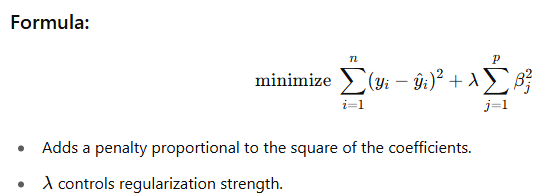

## When to use:
1. When you have multicollinearity (highly correlated features).
2. To prevent overfitting by shrinking coefficients.
3. When you want all features to stay in the model but smaller.

## When not to use:
1. When feature selection (removing features) is desired (use Lasso).
2. When coefficients should be exactly zero for feature elimination.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/final_student_data.csv")  # Or use any built-in dataset
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [5]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df['total']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
ridge = Ridge(alpha=1.0)  # you can try alpha=0.1, 10, etc.
ridge.fit(X_train, y_train)

Ridge()

In [9]:
# Predict
y_pred = ridge.predict(X_test)

In [10]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Ridge Regression Results:
Mean Squared Error: 1617.6762157574842
R2 Score: 0.16152129249555747


## Tune Alpha with Cross-Validation

In [11]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)

Best alpha: 1.0


📊 Ridge Regression Performance
MSE = 1617.68

✅ Better than before (your earlier MSE was over 2400 in polynomial regression).

But still a bit high — there's room to improve.

R² = 0.16

✅ Now your model explains 16% of the variance in math scores.

That’s a clear improvement, but still not strong enough for a good regression model.

Ideally, you'd aim for R² > 0.6 in a practical setting.

✅ What This Means
Ridge regression helped reduce overfitting compared to polynomial regression, but it’s still not capturing enough signal from the features.

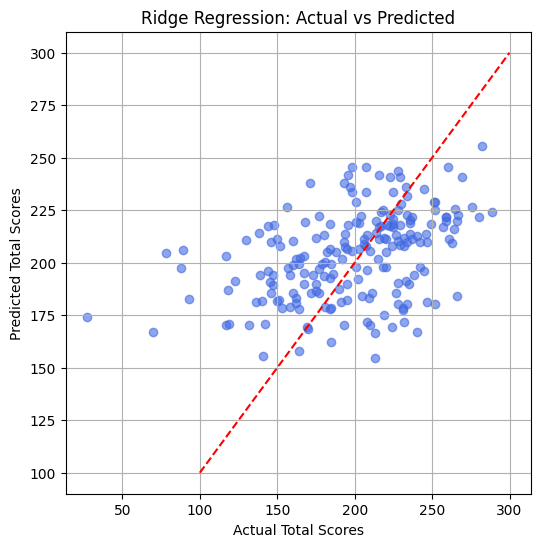

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([100, 300], [100, 300], 'r--')   # Diagonal line: perfect prediction
plt.xlabel("Actual Total Scores")
plt.ylabel("Predicted Total Scores")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

❗ What's Wrong / What It Tells Us
1. Predictions are very compressed
  * Most predicted scores are clustered between 180 and 240.

  * But actual scores range from around 100 to 280.

  * This shows underfitting: the model isn’t capturing the true variation in the data.

2. Points are far from the red line
  * A good regression model should produce points that lie close to the red diagonal.

  * In your case, points are heavily scattered above the red line for low actual scores, and below it for high actual scores.

  * This suggests the model tends to predict average values, not extremes.